In [1]:
library(cowplot)
library(ggplot2)
library(data.table)
library(ggupset)
library(dplyr)
library(tidyr)
library(forcats)

setwd("~/HRJ_monocytes/ATAC-seq/qc/collated/")

## Running the following in DT_DPLYR conda env


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




png 
  2

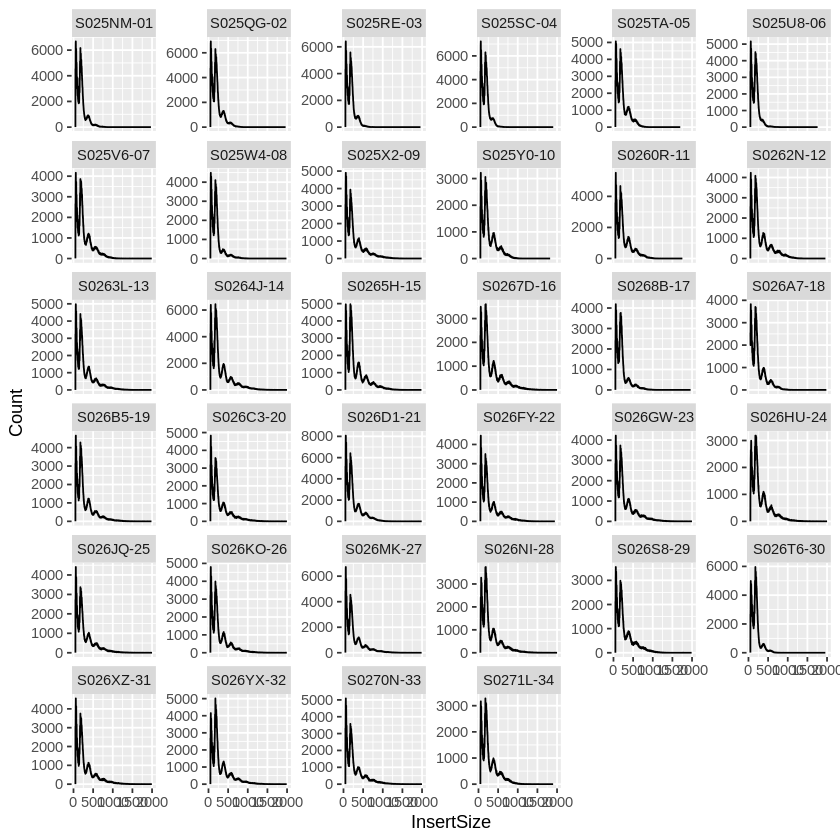

In [7]:
sizes_list<- readRDS("allFragSizes_list.rds")
sizes_list_toplot <- do.call(rbind, sizes_list)
p <- ggplot(sizes_list_toplot, aes(x=InsertSize, y=Count))+geom_line() + facet_wrap(vars(Sample), ncol = 6, scales = "free_y")

# Plot the combined nucFree object
rawinsertName <- "allSamples_noSep_insertsizes.pdf"
pdf (file = rawinsertName)
print(p)
dev.off()

print(p)

In [8]:
### This needs to run in chipSeeker env
### In the end I ran this on the command line

library(ChIPseeker)
library("TxDb.Hsapiens.UCSC.hg38.knownGene")
#txdb <- TxDb.Hsapiens.UCSC.hg38.knownGene

#peak <- readPeakFile("~/HRJ_monocytes/ATAC-seq/analyses/HMMRATAC/consensus/output/ATAC_merged_34reps_HMMRATAC_withBlacklist_peaks.gappedPeak")

# Display peak locations across entire genome
print(peak)

# Perform peak annotation
#peakAnno <- annotatePeak(files[[4]], tssRegion=c(-3000, 3000),
#                         TxDb=txdb, annoDb="org.Hs.eg.db")

#plotAnnoPie(peakAnno)

#upsetplot(peakAnno, vennpie=TRUE)

#plotDistToTSS(peakAnno,
#              title="Distribution of transcription factor-binding loci relative to TSS")



Registered S3 method overwritten by 'ggtree':
  method      from 
  identify.gg ggfun

ChIPseeker v1.30.3  For help: https://guangchuangyu.github.io/software/ChIPseeker

If you use ChIPseeker in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Qing-Yu He. ChIPseeker: an R/Bioconductor package for ChIP peak annotation, comparison and visualization. Bioinformatics 2015, 31(14):2382-2383

Loading required package: GenomicFeatures

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table,

ERROR: Error in print(peak): object 'peak' not found


In [2]:
###### Plot the FRiP scores... these were obtained by calling peaks with macs2 and then using featureCounts from subread to obtain fraction of reads in peaks (narrowPeak files).

library(data.table)
library(ggplot2)
setwd("~/HRJ_monocytes/ATAC-seq/analyses/macs2")
# read in the samples
allSamples <- fread("~/HRJ_monocytes/ATAC-seq/clean/clean_samples_for_fragSizes.txt")
mySamples <- allSamples$Sample
print(mySamples)

fripDt <- data.table()
for(mysample in mySamples) {
    counts <- fread(paste0(mysample, "_readCountInPeaks.txt.summary"))
    assigned_counts <- as.numeric(counts[Status == "Assigned", 2])
    total_counts <- as.numeric(assigned_counts + counts[Status == "Unassigned_NoFeatures", 2] + counts[Status == "Unassigned_Ambiguity", 2])
    FRiP <- assigned_counts/total_counts
    mydt <- data.table(Sample = mysample, 
                  FRiP = FRiP)
    fripDt <- rbind(fripDt, mydt)
}

print(fripDt)

 [1] "S025NM-01" "S025QG-02" "S025RE-03" "S025SC-04" "S025TA-05" "S025U8-06"
 [7] "S025V6-07" "S025W4-08" "S025X2-09" "S025Y0-10" "S0260R-11" "S0262N-12"
[13] "S0263L-13" "S0264J-14" "S0265H-15" "S0267D-16" "S0268B-17" "S026A7-18"
[19] "S026B5-19" "S026C3-20" "S026D1-21" "S026FY-22" "S026GW-23" "S026HU-24"
[25] "S026JQ-25" "S026KO-26" "S026MK-27" "S026NI-28" "S026S8-29" "S026T6-30"
[31] "S026XZ-31" "S026YX-32" "S0270N-33" "S0271L-34"
       Sample      FRiP
 1: S025NM-01 0.2894881
 2: S025QG-02 0.3195268
 3: S025RE-03 0.3302522
 4: S025SC-04 0.3221568
 5: S025TA-05 0.3523307
 6: S025U8-06 0.3125931
 7: S025V6-07 0.3228585
 8: S025W4-08 0.2887654
 9: S025X2-09 0.2908993
10: S025Y0-10 0.2860680
11: S0260R-11 0.2727565
12: S0262N-12 0.2736796
13: S0263L-13 0.3062907
14: S0264J-14 0.2337424
15: S0265H-15 0.2272127
16: S0267D-16 0.2078003
17: S0268B-17 0.2474572
18: S026A7-18 0.2262772
19: S026B5-19 0.2777281
20: S026C3-20 0.2808078
21: S026D1-21 0.2900800
22: S026FY-22 0.2817640
23: S026GW

png 
  2

[1] "/rds/general/project/lms-spivakov-analysis/live/HRJ_monocytes/ATAC-seq/analyses/macs2"

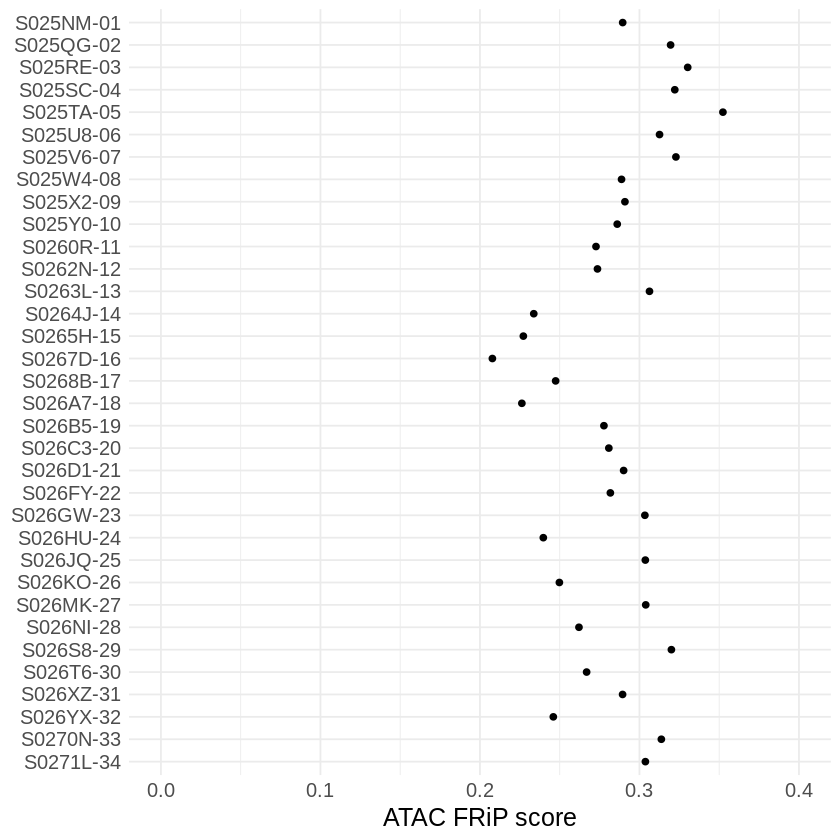

In [4]:
### Plot the scores

### try plotting as individual samples
p <- ggplot(fripDt, aes(x = FRiP, y = fct_rev(Sample))) + geom_point() + theme_minimal() + theme(text = element_text(size = 15), axis.title.y = element_blank()) + 
xlim(0,0.4) + xlab("ATAC FRiP score")
print(p)

### try plotting as a single distribution
#q <- ggplot(fripDt, aes(x = FRiP)) + geom_histogram(binwidth = 0.01, fill = "gray40") + scale_x_continuous(limits = c(0, 0.4), oob = scales::oob_keep) + 
#theme_minimal() + theme(text = element_text(size = 15), axis.title.y=element_text(angle = 0, vjust = 0.5)) + ylab("Number of \nsamples")
#print(q)

pdf(file = "overview_frip.pdf")
print(p)
dev.off()

getwd()

### Save the file.
fwrite(fripDt, file = "~/HRJ_monocytes/paper/source_data/mono_ATAC_frip.txt", 
      sep = "\t", quote = F, row.names = F, col.names = T)

png 
  2

, , Peak in Calderon 20192 = No

                     Peak in Weichselbaum 2020
Peak in present study    No   Yes
                  No      0 51728
                  Yes 46677 46163

, , Peak in Calderon 20192 = Yes

                     Peak in Weichselbaum 2020
Peak in present study    No   Yes
                  No  28825 22955
                  Yes 18562 31888



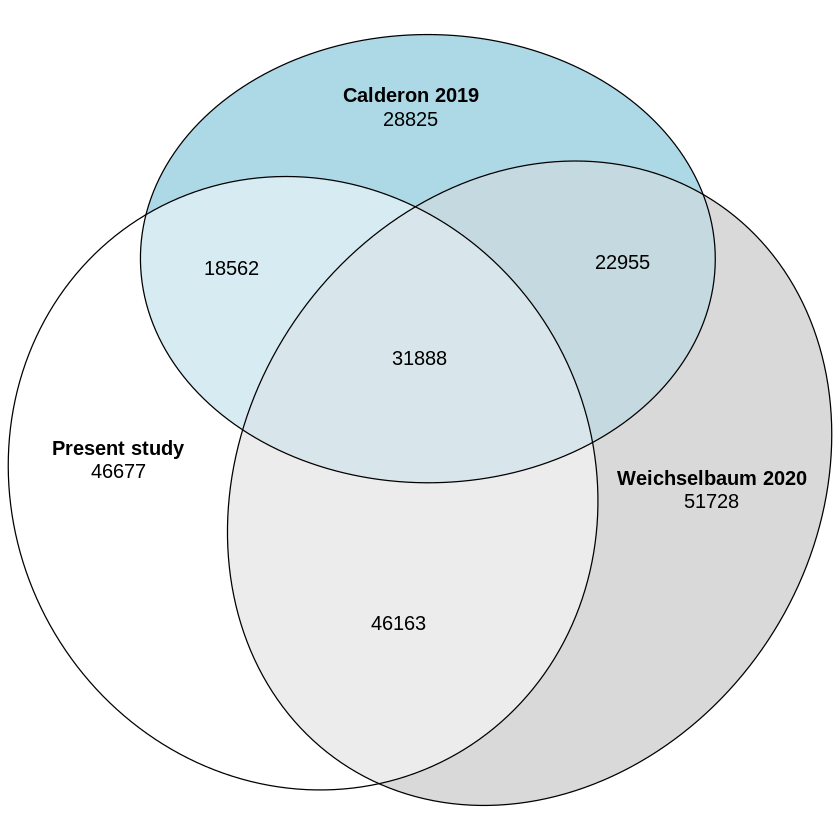

In [21]:
##### Compare peaks in our ATAC versus other published datasets.
###### make a Venn Diagram using the results from multiinter.
library("eulerr")

multiinter <- fread("~/HRJ_monocytes/ATAC-seq/analyses/HMMRATAC/consensus/output/intersects_fixed_weich_green_HMMRATAC.bed")

### The Greenleaf paper is "Calderon et al., 2019, PMID 31570894"
### The Weichselbaum paper is "Weichselbaum et al., 2020 PMID 32145259"

setnames(multiinter, c("fixedMono", "Greenleaf", "Weichselbaum"), 
        c("Present study", "Calderon 2019", "Weichselbaum 2020"))


plot(euler(multiinter[, 6:8], shape = "ellipse"), quantities = TRUE)

pdf(file = "./atac_weich_greenleaf_intersects.pdf", width = 5, height = 5)
plot(euler(multiinter[, 6:8], shape = "ellipse"), quantities = TRUE)
dev.off()

source_data <- multiinter[, .(`Present study`, `Weichselbaum 2020`, `Calderon 2019`)]
source_data[`Present study` == 1, `Peak in present study` := "Yes"]
source_data[`Present study` == 0, `Peak in present study` := "No"]
source_data[`Weichselbaum 2020` == 1, `Peak in Weichselbaum 2020` := "Yes"]
source_data[`Weichselbaum 2020` == 0, `Peak in Weichselbaum 2020` := "No"]
source_data[`Calderon 2019` == 1, `Peak in Calderon 20192` := "Yes"]
source_data[`Calderon 2019` == 0, `Peak in Calderon 20192` := "No"]
source_data <- table(source_data[, 4:6])
print(source_data)

write.table(source_data, file = "~/HRJ_monocytes/paper/source_data/ATAC_QC_pieChart.txt", 
      sep = "\t", quote = F, row.names = F, col.names = T)

In [ ]:
## then to plot an example of ATAC-seq signals, use plotgardener environment. plot_ATAC_difDatasets.ipynb

In [33]:
### To get the source data on peak annotation
library(stringr)
source <- fread("~/HRJ_monocytes/paper/source_data/ATAC_peakAnno.txt")
#print(source)
### Can we just save this instead of the peaks on osf?
### Load the current peaks table
peaks <- fread("~/HRJ_monocytes/ATAC-seq/analyses/HMMRATAC/consensus/output/ATAC_merged_34reps_HMMRATAC_withBlacklist_peaks_forPaper.gappedPeak")
#print(peaks)
source_small <- source[, c("seqnames", "start", "end", "V4", "annotation", "geneChr", "geneStart", "geneEnd", "geneLength", "geneStrand", "geneId", "transcriptId", 
                          "distanceToTSS", "ENSEMBL", "SYMBOL", "GENENAME")]
source_small[, start := start-1]
source_small[, seqnames := str_replace_all(seqnames, "chr", "")]
setnames(source_small, c("seqnames", "start", "end", "V4"), c("chr", "Regulatory region start hg38", "Regulatory region end hg38", "Peak name"))
peak_annot <- peaks[source_small, on = c("chr", "Regulatory region start hg38", "Regulatory region end hg38", "Peak name"), nomatch = NULL]
print(peak_annot)

fwrite(peak_annot, file = "~/HRJ_monocytes/paper/source_data/CD14_ATAC_merged_34reps_HMMRATAC.annotated.gappedPeak", sep = "\t", 
      quote = F, row.names = F, col.names = T)



       chr Regulatory region start hg38 Regulatory region end hg38
    1:  11                       191920                     192940
    2:  11                       201240                     202110
    3:  11                       201790                     202610
    4:  11                       206130                     207140
    5:  11                       207020                     209290
   ---                                                            
74369:   Y                     11290797                   11334278
74370:   Y                     11493053                   11592850
74371:   Y                     11671014                   11671046
74372:   Y                     11721528                   11749472
74373:   Y                     56694632                   56889743
                Peak name Score (not used) Strand (not used)
    1:             Peak_4                .                 .
    2:             Peak_5                .                 .
    3:       

### Format the correlation matrix for the source data

In [17]:
### load data

library(data.table)
coor <- fread("~/HRJ_monocytes/ATAC-seq/qc/all_comparison_pearson_paper.txt")

coor$V1 <- substr(coor$V1, 2, 10)
mynames <- names(coor[, 2:35])
mynames2 <- substr(mynames, 2, 10)
mynames3 <- c("Sample", mynames2)

names(coor) = mynames3
coor

fwrite(coor, file = "~/HRJ_monocytes/paper/source_data/ATAC_correlations_paper.txt", 
      sep = "\t", quote = F, row.names = F, col.names = T)

Sample,S026A7-18,S0264J-14,S0267D-16,S026HU-24,S026KO-26,S026B5-19,S026GW-23,S026XZ-31,S0270N-33,⋯,S026FY-22,S026NI-28,S025QG-02,S026S8-29,S0265H-15,S026D1-21,S025U8-06,S0262N-12,S025V6-07,S026YX-32
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
S026A7-18,1.0000,0.9772,0.9841,0.9825,0.9814,0.9812,0.9811,0.9708,0.9778,⋯,0.9761,0.9776,0.9603,0.9634,0.9639,0.9527,0.9584,0.9525,0.9563,0.9552
S0264J-14,0.9772,1.0000,0.9874,0.9852,0.9880,0.9893,0.9849,0.9795,0.9818,⋯,0.9794,0.9750,0.9590,0.9618,0.9805,0.9588,0.9575,0.9612,0.9606,0.9654
S0267D-16,0.9841,0.9874,1.0000,0.9866,0.9862,0.9862,0.9841,0.9770,0.9835,⋯,0.9791,0.9792,0.9558,0.9629,0.9712,0.9572,0.9609,0.9555,0.9594,0.9607
S026HU-24,0.9825,0.9852,0.9866,1.0000,0.9902,0.9874,0.9885,0.9792,0.9823,⋯,0.9801,0.9805,0.9612,0.9643,0.9680,0.9549,0.9693,0.9642,0.9679,0.9636
S026KO-26,0.9814,0.9880,0.9862,0.9902,1.0000,0.9905,0.9891,0.9812,0.9835,⋯,0.9787,0.9795,0.9633,0.9648,0.9699,0.9539,0.9718,0.9661,0.9695,0.9656
S026B5-19,0.9812,0.9893,0.9862,0.9874,0.9905,1.0000,0.9897,0.9839,0.9860,⋯,0.9815,0.9808,0.9617,0.9633,0.9751,0.9577,0.9677,0.9651,0.9676,0.9689
S026GW-23,0.9811,0.9849,0.9841,0.9885,0.9891,0.9897,1.0000,0.9803,0.9831,⋯,0.9849,0.9817,0.9670,0.9709,0.9728,0.9624,0.9716,0.9685,0.9685,0.9660
S026XZ-31,0.9708,0.9795,0.9770,0.9792,0.9812,0.9839,0.9803,1.0000,0.9873,⋯,0.9731,0.9771,0.9626,0.9616,0.9739,0.9562,0.9707,0.9700,0.9794,0.9803
S0270N-33,0.9778,0.9818,0.9835,0.9823,0.9835,0.9860,0.9831,0.9873,1.0000,⋯,0.9772,0.9799,0.9588,0.9626,0.9675,0.9556,0.9682,0.9614,0.9703,0.9687
